
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">Customer Segmentation and Analysis</p>

# <b><span style='color:#ff6200'> Importing Necessary Libraries</span></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
import sklearn 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("pandas version:" ,pd.__version__)
print("numpy version:",np.__version__)
print("seaborn version:",sns.__version__)
print("scikit-learn version:",sklearn.__version__)

pandas version: 1.5.3
numpy version: 1.24.0
seaborn version: 0.12.2
scikit-learn version: 1.6.1


In [3]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# <b><span style='color:#ff6200'> Loading the Dataset</span></b>

In [4]:
original_customers_df = pd.read_csv("dataset/Customers.csv")
original_transactions_df = pd.read_csv("dataset/Transactions.csv")

In [5]:
customers_df = original_customers_df
transactions_df = original_transactions_df

# <span style='color:#ff6200'> Dataset Overview</span></b>

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [8]:
transactions_df.head(10)

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   
5        T00442      C0188      P067  2024-12-26 14:40:03         1   
6        T00490      C0195      P067  2024-11-24 11:49:48         3   
7        T00536      C0008      P067   2024-09-22 6:13:59         1   
8        T00564      C0157      P067  2024-12-07 17:57:40         3   
9        T00631      C0130      P067  2024-05-14 23:14:59         2   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
5      300.68  300.68  
6      902.04  300.68  
7      300.68  300.68  
8      902.04  300.68  
9      601.36  300.68

# <span style='color:#ff6200'> Summary Statistics</span></b>

In [9]:
# Summary statistics for numerical variables
transactions_df.describe().T

count       mean         std    min      25%     50%      75%  \
Quantity    1000.0    2.53700    1.117981   1.00    2.000    3.00     4.00   
TotalValue  1000.0  689.99556  493.144478  16.08  295.295  588.88  1011.66   
Price       1000.0  272.55407  140.736390  16.08  147.950  299.93   404.40   

                max  
Quantity       4.00  
TotalValue  1991.04  
Price        497.76

In [10]:
customers_df.describe().T

count unique               top freq
CustomerID     200    200             C0001    1
CustomerName   200    200  Lawrence Carroll    1
Region         200      4     South America   59
SignupDate     200    179        2024-11-11    3

In [11]:
transactions_df.describe(include="object").T

count unique                  top freq
TransactionID    1000   1000               T00001    1
CustomerID       1000    199                C0109   11
ProductID        1000    100                 P059   19
TransactionDate  1000   1000  2024-08-25 12:38:23    1


#  <b><span style='color:#ff6200'> Dataset Cleaning & Transformation</span></b>


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### **Insights from Customer Data Exploration from EDA file**

-  **No Missing Values:** The Customers dataset does not contain any null values.  
-  **No Duplicates:** There are no duplicate records in the dataset.  
- **Customer Distribution by Region:**  
  - **South America:** 59 customers  
  - **Asia:** 45 customers  
  - **North America:** 46 customers  
  - **Europe:** 50 customers  
- "The customer distribution across regions appears **fairly balanced, with no significant skewness."**


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
### Insight from Transactions Data  from EDA file

- We have **1,000 transactions** recorded in the dataset.  
- The **TransactionDate** column needs to be **converted to datetime format** for accurate time-based analysis.  
- **No missing values** were found in the transaction data, ensuring data completeness.  
- we have data from **2023-12-30**  to **2024-12-28**.


#  <b><span style='color:#ff6200'> Converting dtypes of the columns</span></b>


In [12]:
# Convert TransactionDate to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Convert SignupDate to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])


#  <b><span style='color:#ff6200'> Feature Engineering </span></b>


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:


#  <b><span style='color:#ff6200'> RFM Features </span></b>


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

- __Recency (R):__ This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

    
- __Frequency (F):__ This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

    
- __Monetary (M):__ This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

    
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.


#  <b><span style='color:#ff6200'> Recency (R) </span></b>

In [13]:
# Calculate Recency
max_date = transactions_df['TransactionDate'].max()
recency_df = transactions_df.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency_df['Recency'] = (max_date - recency_df['TransactionDate']).dt.days



#  <b><span style='color:#ff6200'> Frequency(F) </span></b>

In [14]:
# Calculate Frequency
frequency_df = transactions_df.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency_df.rename(columns={'TransactionID': 'Frequency'}, inplace=True)


#  <b><span style='color:#ff6200'> Monetary (M)</span></b>

In [15]:
# Calculate Monetary
monetary_df = transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
monetary_df.rename(columns={'TotalValue': 'Monetary'}, inplace=True)


#  <b><span style='color:#ff6200'>Merging R M F dataset</span></b>

In [16]:
# Merge RFM metrics
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
rfm_df = rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']]


# <b><span style='color:#ff6200'> K- Means Clustering </span></b>

## Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])
rfm_normalized = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'])
rfm_normalized['CustomerID'] = rfm_df['CustomerID']


# <b><span style='color:#ff6200'>   Determining the Optimal Number of Clusters</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
        
## Elbow Method for Optimal K Selection

To determine the optimal number of clusters for K-Means, we used the **Elbow Method**, which analyzes the distortion score for different values of **k**.


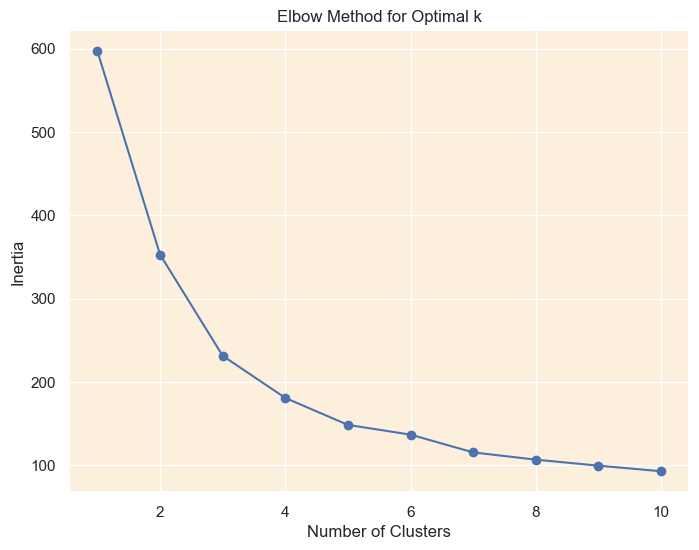

In [18]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized[['Recency', 'Frequency', 'Monetary']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

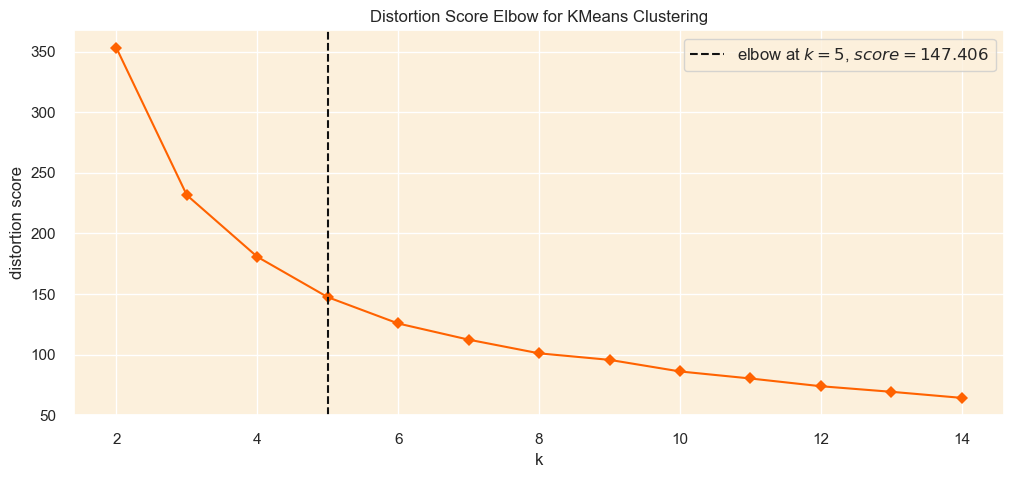

In [19]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

fig, ax = plt.subplots(figsize=(12, 5))
# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)
visualizer.fit(rfm_normalized[['Recency', 'Frequency', 'Monetary']])
visualizer.show();

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

### **Elbow Curve Analysis**
The plot below shows the **distortion score** for different values of **k**. The point where the curve bends (elbow) represents the optimal number of clusters.

- The elbow occurs at **k = 5** with a distortion score of **147.406**.
- This suggests that **5 clusters** are a suitable choice for segmentation.

---


# <b><span style='color:#ff6200'> K-Means Clustering</span></b>

In [20]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_normalized['Cluster'] = kmeans.fit_predict(rfm_normalized[['Recency', 'Frequency', 'Monetary']])

# Merge the cluster information back to the original RFM DataFrame
rfm_df['Cluster'] = rfm_normalized['Cluster']


# <b><span style='color:#ff6200'> Cluster Summary</span></b>

In [21]:
# Calculate the average RFM values for each cluster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster     Recency  Frequency     Monetary
0        0   33.944444   8.277778  6045.326389
1        1   37.781250   3.656250  2055.942344
2        2  274.916667   1.333333   764.795000
3        3   66.620690   5.844828  4216.827759
4        4  134.517241   3.896552  3001.032759


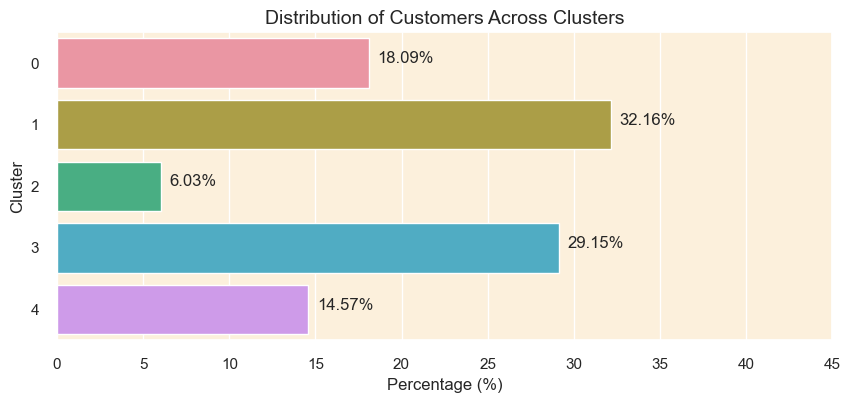

In [22]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (rfm_df['Cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h')

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

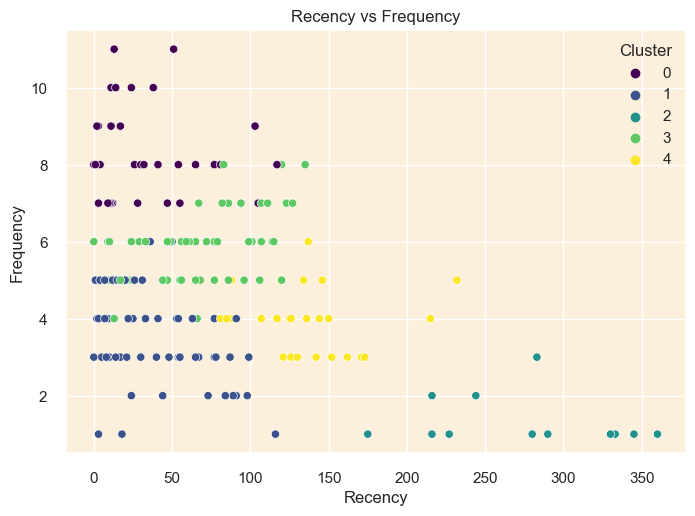

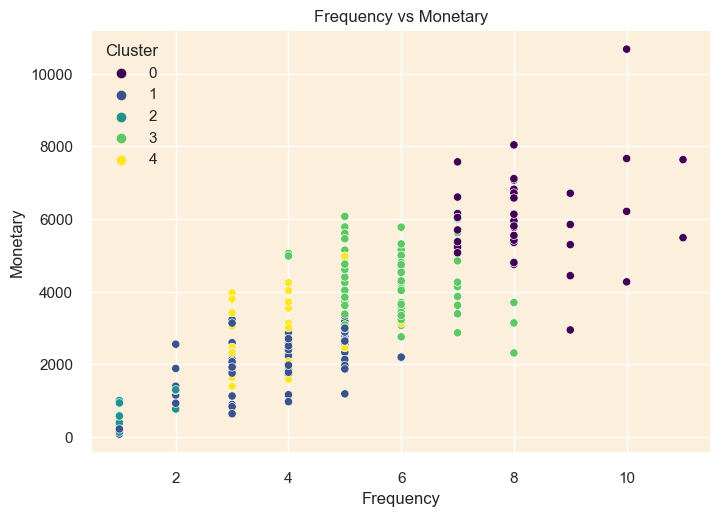

In [23]:
# Scatter plot of Recency vs Frequency
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Recency vs Frequency')
plt.show()

# Scatter plot of Frequency vs Monetary
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Frequency vs Monetary')
plt.show()

In [24]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    rfm_df, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster', 
    color_continuous_scale='viridis',  # Same palette as Seaborn
    title='3D Interactive Scatter Plot of RFM Segments'
)

# Show interactive plot
fig.show()


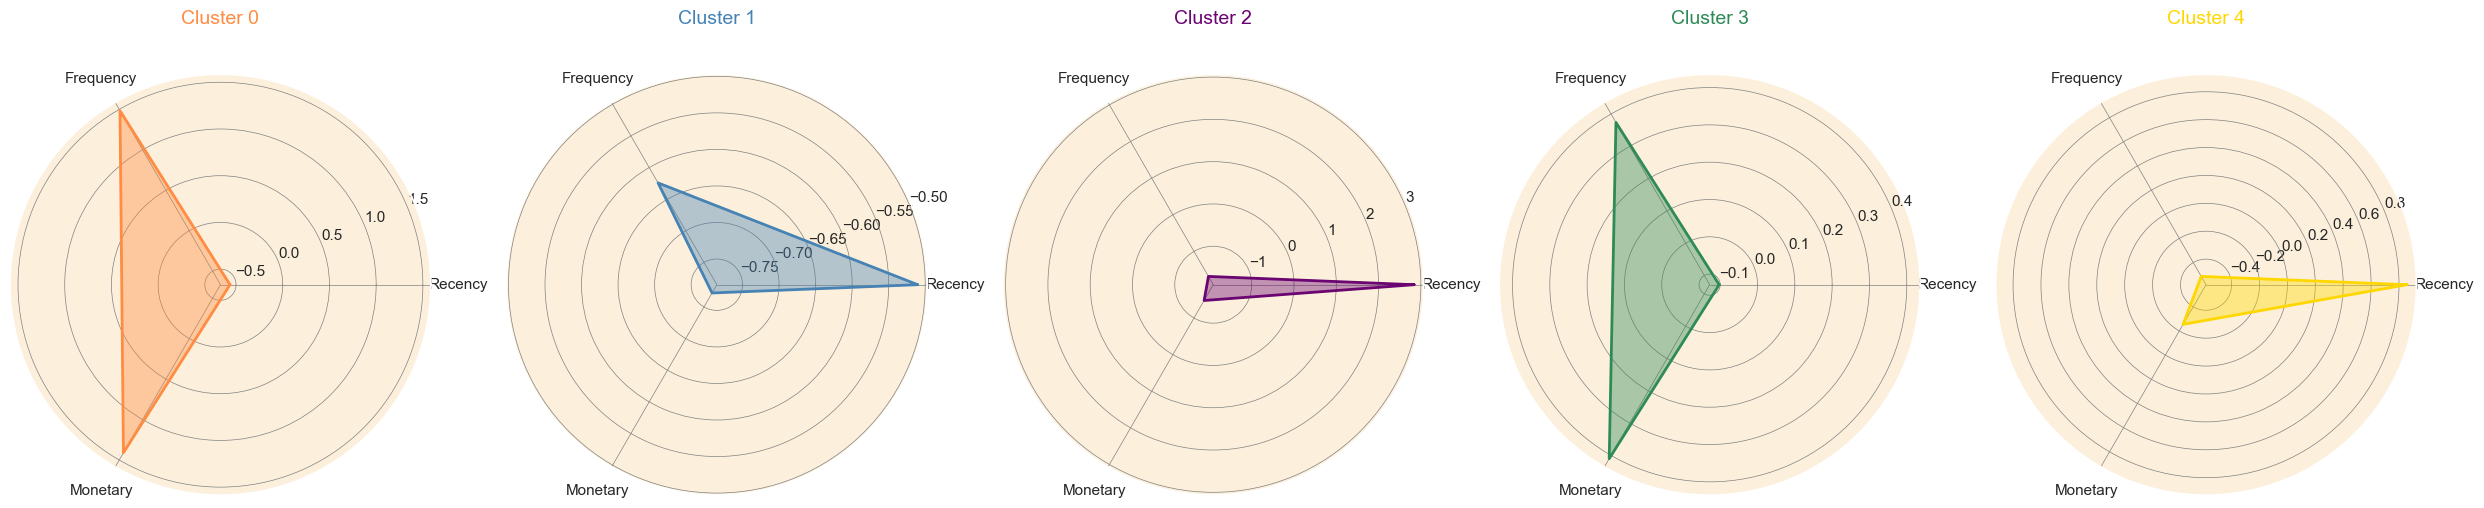

In [25]:
# Set colors
colors = ["#FF8C42", "#4682B4", "#6A0572", "#2E8B57", "#FFD700"]

df_customer = rfm_df.drop(columns=["CustomerID"])

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.set_title(f'Cluster {cluster}', size=14, color=color, y=1.1)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with 5 subplots
fig, ax = plt.subplots(figsize=(25, 10), subplot_kw=dict(polar=True), nrows=1, ncols=5)

# Create radar charts for each cluster
for i, color in enumerate(colors):
    if i in cluster_centroids.index:  # Ensure the cluster exists
        data = cluster_centroids.loc[i].tolist()
        data += data[:1]  # Complete the loop
        create_radar_chart(ax[i], angles, data, color, i)
        ax[i].set_xticks(angles[:-1])
        ax[i].set_xticklabels(labels[:-1])
        ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# Radar Chart Interpretation of Customer Clusters


Each cluster represents a group of customers with **similar purchasing behavior**.

---

## Cluster Breakdown

### **🟠 Cluster 0 (Orange)**
- **High Frequency & Monetary values**, indicating **loyal customers** with frequent and high-value purchases.
- **Low Recency**, meaning they have made purchases recently.

### **🔵 Cluster 1 (Blue)**
- **Moderate Frequency & Recency**, but **low Monetary value**.
- These might be **regular customers** with lower spending.

### **🟣 Cluster 2 (Purple)**
- **Low across all metrics**, indicating **inactive or disengaged customers**.
- They rarely purchase and may not have returned in a while.

### **🟢 Cluster 3 (Green)**
- **Balanced Frequency and Monetary values**, but **higher Recency**.
- Possibly **new customers with potential to become loyal**.

### **🟡 Cluster 4 (Yellow)**
- **High Recency but very low Frequency & Monetary values**.
- Likely **one-time or very infrequent buyers**.

---

## Key Insights
- **Clusters 0 & 3** contain the most valuable customers.
- **Clusters 2 & 4** indicate customers at risk of churn.
- **Cluster 1** might require targeted promotions to increase spending.

### **Business Action Points**
- **Retarget Cluster 2 & 4** with special offers to re-engage them.
- **Encourage Cluster 1** with personalized discounts to increase purchase frequency.
- **Loyalty rewards for Cluster 0 & 3** to maintain engagement.

---




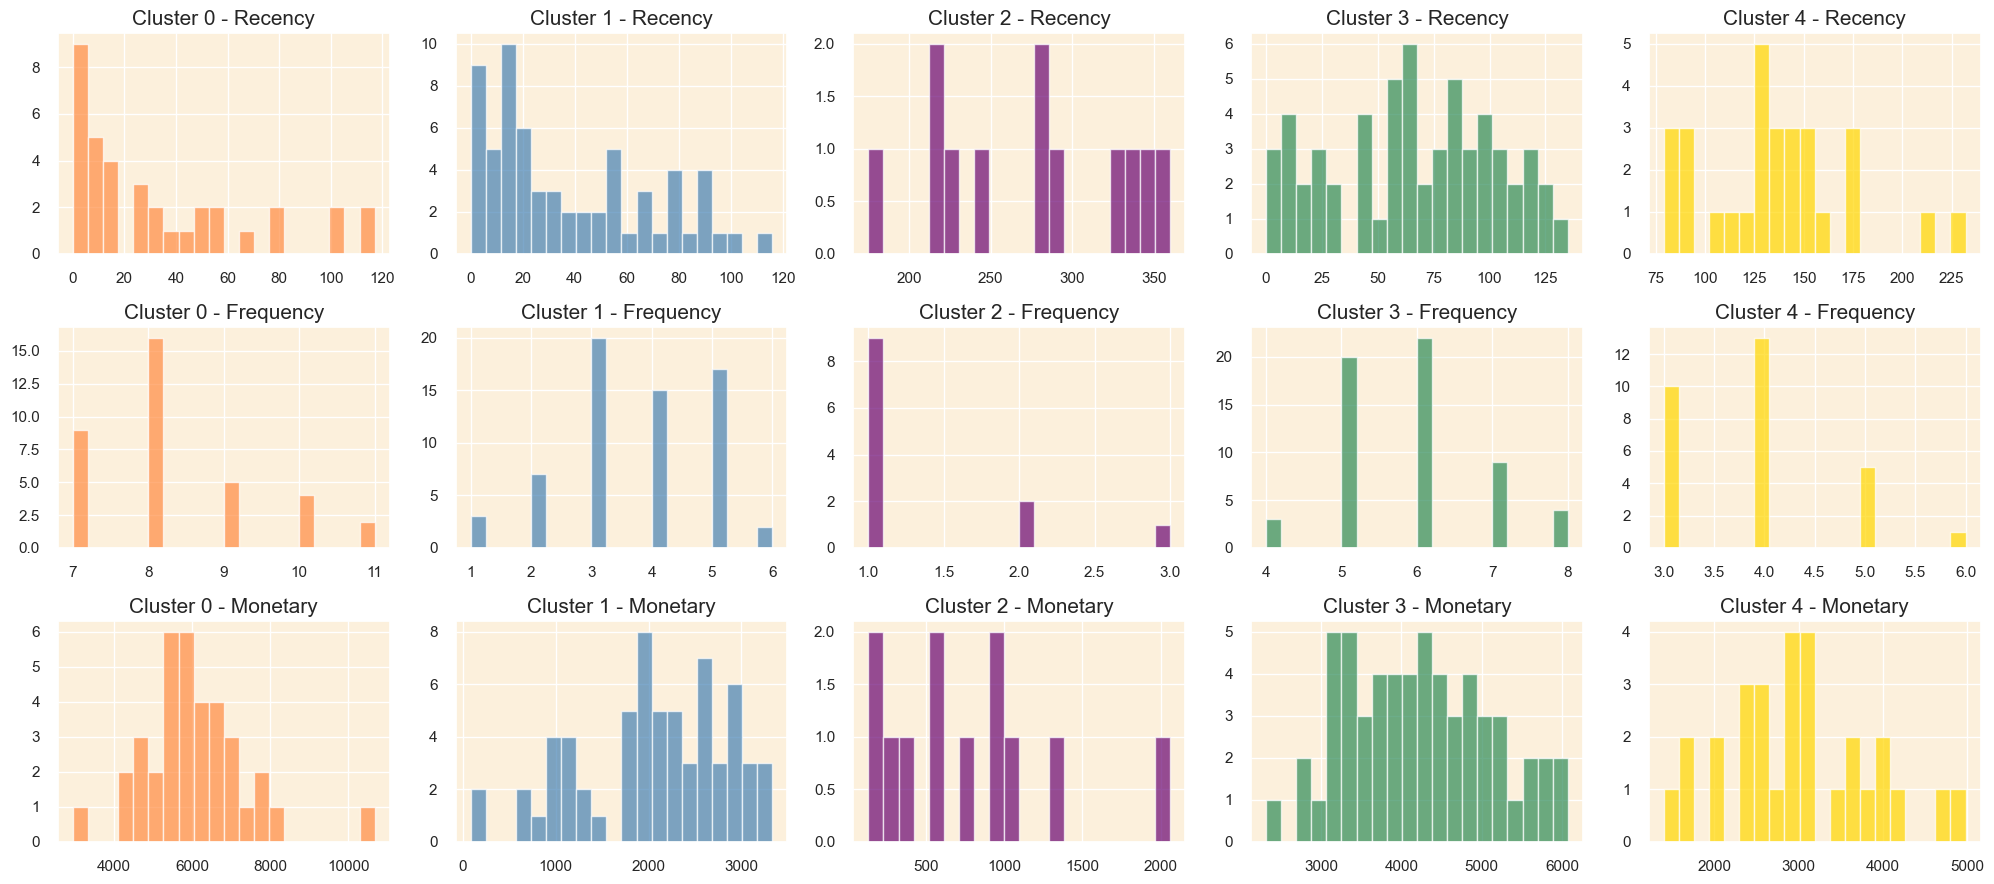

In [26]:
# Plot histograms for each feature segmented by the clusters
features = rfm_df.columns[1:-1]
clusters = rfm_df['Cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = rfm_df[rfm_df['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()


# <b><span style='color:#ff6200'> Cluster Evaluation</span></b>

In [27]:
from sklearn.metrics import davies_bouldin_score

# Ensure rfm_normalized contains only numeric features
rfm_numeric = rfm_normalized.drop(columns=['CustomerID'])  # Drop non-numeric columns

# Calculate DB Index
db_index = davies_bouldin_score(rfm_numeric, rfm_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6591102117528971


In [28]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(rfm_normalized[['Recency', 'Frequency', 'Monetary']], rfm_df['Cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.3124740851299791


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
# Customer Segmentation Analysis

## Clustering Results

The clustering algorithm has divided the customers into five distinct clusters, each characterized by their Recency, Frequency, and Monetary (RFM) values.

| Cluster | Recency (Avg Days) | Frequency (Avg Orders) | Monetary (Avg Spend) | Customer Profile |
|---------|--------------------|------------------------|----------------------|------------------|
| **0**   | 33.94              | 8.28                   | ₹6045.33             | High-Value, Frequent Buyers |
| **1**   | 37.78              | 3.66                   | ₹2055.94             | Mid-Tier, Occasional Buyers |
| **2**   | 274.92             | 1.33                   | ₹764.80              | Inactive Customers |
| **3**   | 66.62              | 5.84                   | ₹4216.83             | Loyal, High-Spending Customers |
| **4**   | 134.52             | 3.90                   | ₹3001.03             | Moderate-Value Customers |

---

## Cluster Profiling & Insights

### **Cluster 0: High-Value, Frequent Buyers**
- **Characteristics:** Customers in this group have a low recency of around 34 days, high purchase frequency of about 8.28 orders, and the highest monetary contribution of approximately ₹6045.
- **Strategy:** Retain them with VIP programs, exclusive deals, and priority customer service.

### **Cluster 1: Mid-Tier, Occasional Buyers**
- **Characteristics:** These customers have a moderate recency of about 38 days, lower purchase frequency of 3.66 orders, and moderate spending at ₹2055.
- **Strategy:** Encourage repeat purchases through personalized offers, discounts, and reminder emails.

### **Cluster 2: Inactive Customers**
- **Characteristics:** This segment has the highest recency of about 275 days, very low purchase frequency of 1.33 orders, and the lowest monetary contribution at ₹764.
- **Strategy:** Re-engage them through win-back campaigns, special discounts, and feedback collection to understand why they left.

### **Cluster 3: Loyal, High-Spending Customers**
- **Characteristics:** Customers in this cluster have a recency of around 66 days, high purchase frequency of 5.84 orders, and a high monetary contribution of ₹4216.
- **Strategy:** Strengthen engagement through referral programs, exclusive product launches, and personalized recommendations.

### **Cluster 4: Moderate-Value Customers**
- **Characteristics:** Customers in this group have a mid-range recency of approximately 134 days, moderate purchase frequency of 3.90 orders, and a reasonable spending level of ₹3001.
- **Strategy:** Improve retention by offering tailored promotions, bundle deals, and incentives for higher-order values.

---

## Clustering Performance Evaluation

- **Davies-Bouldin Index (DBI):** `0.6591`
  - A lower DBI indicates well-separated clusters. Since this value is relatively low, the clusters are reasonably well-defined.
  
- **Silhouette Score:** `0.3125`
  - This score ranges from `-1` to `1`. A value of 0.3 suggests moderate clustering quality, indicating some overlap between clusters.

---

## Final Recommendations

1. **Focus on Clusters 0 & 3** → These are high-value and repeat customers. Keep them engaged with VIP programs, rewards, and special deals.  
2. **Convert Cluster 1 into Cluster 3** → This group has potential; provide personalized offers and engagement strategies to increase purchase frequency.  
3. **Re-engage Cluster 2 (Lost Customers)** → Run win-back campaigns, send targeted discounts, and gather feedback to understand their inactivity.  
4. **Monitor Cluster Movement** → Track how customers transition between clusters over time to refine marketing and retention strategies.  
5. **Optimize Marketing Efforts** → Allocate more resources to clusters with the highest return on investment while minimizing acquisition costs for low-value segments.  

---

### Conclusion
The clustering results provide meaningful customer segmentation and actionable insights. The next steps should focus on targeted retention strategies, customer engagement, and continuous monitoring of cluster dynamics to maximize business growth.




# <b><span style='color:#ff6200'> Additional operations for looklike model </span></b>

In [29]:
rfm_df.to_csv("dataset/Clusters.csv")

In [30]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  199 non-null    object 
 1   Recency     199 non-null    int64  
 2   Frequency   199 non-null    int64  
 3   Monetary    199 non-null    float64
 4   Cluster     199 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 8.6+ KB



# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">THANK YOU</p>